<a href="https://colab.research.google.com/github/Guhabrus/Homawork-AI/blob/main/Heat_Two_DeepXDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation


In [ ]:
!pip install deepxde

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 5.1 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
from deepxde.backend import tf


DeepXDE backend not selected or invalid. Use tensorflow.compat.v1.
Using backend: tensorflow.compat.v1



Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Instructions for updating:
non-resource variables are not supported in the long term


Enable just-in-time compilation with XLA.



In [ ]:

# Some useful functions
t1 = 0
t2 = 1
end_time = 1

def pde(X,T):
    dT_xx = dde.grad.hessian(T, X ,j=0)
    dT_yy = dde.grad.hessian(T, X, j=1)
    dT_t = dde.grad.jacobian(T, X, j=2)
#     Dividing by rhoc to make it 1
    rhoc = (3.8151 * 10**3) / (3.8151 * 10**3)
    kap = (385 / (3.8151 * 10**3))
    # no forcing function
    return ((rhoc * dT_t) - (kap * (dT_xx + dT_yy)))


def r_boundary(X,on_boundary):
    x,y,t = X
    return on_boundary and np.isclose(x,1)
def l_boundary(X,on_boundary):
    x,y,t = X
    return on_boundary and np.isclose(x,0)
def up_boundary(X,on_boundary):
    x,y,t = X
    return on_boundary and np.isclose(y,1)
def down_boundary(X,on_boundary):
    x,y,t = X
    return on_boundary and np.isclose(y,0)

def boundary_initial(X, on_initial):
    x,y,t = X
    return on_initial and np.isclose(t, 0)

def init_func(X):
    x = X[:, 0:1]
    y = X[:, 1:2]
    t = np.zeros((len(X),1))
    for count,x_ in enumerate(x):
        if x_ < 0.5:
            t[count] = t1
        else:
            t[count] = t1 + (2) * (x_ - 0.5)
    return t
    
def dir_func_l(X):
    return t1 * np.ones((len(X),1))


def dir_func_r(X):
    return t2 * np.ones((len(X),1))

def func_zero(X):
    return np.zeros((len(X),1))
def hard(X, T):
    x,y,t = x[:, 0:1], x[:, 1:2],x[:,2:3]
    
    return (r - r_in) * y + T_star

Compiling model...
Building feed-forward neural network...
'build' took 0.081357 s



/usr/local/lib/python3.9/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 4.852825 s

Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.36e+00, 9.57e-02, 2.30e-01, 5.05e-03, 3.64e-02, 6.79e-01]    [1.36e+00, 9.57e-02, 2.30e-01, 5.05e-03, 3.64e-02, 6.79e-01]    []  
1000      [4.10e-04, 6.51e-05, 2.27e-04, 9.78e-04, 1.88e-05, 5.64e-03]    [4.10e-04, 6.51e-05, 2.27e-04, 9.78e-04, 1.88e-05, 5.64e-03]    []  
2000      [3.70e-04, 1.33e-04, 1.50e-04, 9.10e-04, 1.17e-05, 4.12e-03]    [3.70e-04, 1.33e-04, 1.50e-04, 9.10e-04, 1.17e-05, 4.12e-03]    []  
3000      [3.43e-04, 2.11e-04, 1.62e-04, 8.74e-04, 7.06e-06, 2.96e-03]    [3.43e-04, 2.11e-04, 1.62e-04, 8.74e-04, 7.06e-06, 2.96e-03]    []  
4000      [2.39e-04, 2.07e-04, 1.36e-04, 8.62e-04, 3.87e-06, 2.26e-03]    [2.39e-04, 2.07e-04, 1.36e-04, 8.62e-04, 3.87e-06, 2.26e-03]    []  
5000      [3.07e-04, 2.06e-04, 2.23e-04, 8.60e-04, 2.29e-06, 1.

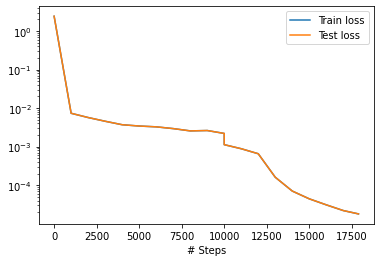

In [ ]:

num_domain = 30000
num_boundary = 8000
num_initial = 20000
layer_size = [3] + [60] * 5 + [1]
activation_func = "tanh"
initializer = "Glorot uniform"
lr = 1e-3
# Applying Loss weights as given below
# [PDE Loss, BC1 loss - Dirichlet Left , BC2 loss - Dirichlet Right, BC3 loss- Neumann up, BC4 loss - Neumann down, IC Loss]
loss_weights = [10, 1, 1, 1, 1, 10]
epochs = 10000
optimizer = "adam"
batch_size_ = 256

geom = dde.geometry.Rectangle(xmin=[0, 0], xmax=[1, 1])
timedomain = dde.geometry.TimeDomain(0, end_time)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc_l = dde.DirichletBC(geomtime, dir_func_l, l_boundary)
bc_r = dde.DirichletBC(geomtime, dir_func_r, r_boundary)
bc_up = dde.NeumannBC(geomtime, func_zero, up_boundary)
bc_low = dde.NeumannBC(geomtime, func_zero, down_boundary)
ic = dde.IC(geomtime, init_func, boundary_initial)


data = dde.data.TimePDE(
    geomtime, pde, [bc_l, bc_r, bc_up, bc_low, ic], num_domain=num_domain, num_boundary=num_boundary,  num_initial=num_initial)



net = dde.maps.FNN(layer_size, activation_func, initializer)
net.apply_output_transform(lambda x, y: abs(y))
## Uncomment below line to apply hard Dirichlet Boundary Conditions
# net.outputs_modify(lambda x, y: x[:,0:1]*t2 + x[:,0:1] * (1 - x[:,0:1]) * y)
model = dde.Model(data, net)

model.compile(optimizer, lr=lr,loss_weights=loss_weights)
# To save the best model every 1000 epochs
checker = dde.callbacks.ModelCheckpoint(
    "model/model1.ckpt", save_better_only=True, period=1000
)
losshistory, trainstate = model.train(epochs=epochs,batch_size = batch_size_,callbacks = [checker])
model.compile("L-BFGS-B")
dde.optimizers.set_LBFGS_options(
    maxcor=50,
)
losshistory, train_state = model.train(epochs = epochs, batch_size = batch_size_)
dde.saveplot(losshistory, trainstate, issave=True, isplot=True)

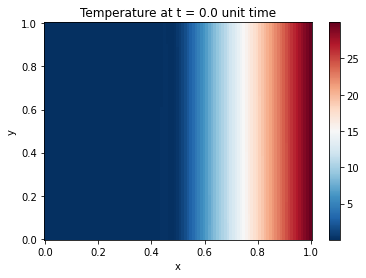

In [ ]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


# ax = fig.add_subplot(111)
nelx = 100
nely = 100
timesteps = 101
x = np.linspace(0,1,nelx+1)
y = np.linspace(0,1,nely+1)
t = np.linspace(0,1,timesteps)
delta_t = t[1] - t[0]
xx,yy = np.meshgrid(x,y)


x_ = np.zeros(shape = ((nelx+1) * (nely+1),))
y_ = np.zeros(shape = ((nelx+1) * (nely+1),))
for c1,ycor in enumerate(y):
    for c2,xcor in enumerate(x):
        x_[c1*(nelx+1) + c2] = xcor
        y_[c1*(nelx+1) + c2] = ycor
Ts = []
        
for time in t:
    t_ = np.ones((nelx+1) * (nely+1),) * (time)
    X = np.column_stack((x_,y_))
    X = np.column_stack((X,t_))
    T = model.predict(X)
    T = T*30
    T = T.reshape(T.shape[0],)
    T = T.reshape(nelx+1,nely+1)
    Ts.append(T)
def plotheatmap(T,time):
  # Clear the current plot figure
    plt.clf()
    plt.title(f"Temperature at t = {time*delta_t} unit time")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.pcolor(xx, yy, T,cmap = 'RdBu_r')
    plt.colorbar()
    return plt

def animate(k):
    plotheatmap(Ts[k], k)
    
anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=len(t), repeat=False)
    
anim.save("trial1.gif")